In [12]:
#Required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle
import re

import nltk
import nltk.data
from string import punctuation 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords

In [2]:
#Reading dataset into dataframe. 
df_emotions = pd.read_pickle('../data/raw/emotions_training.pkl')
df_senti=pd.read_csv("../data/raw/sentiments_training.csv", encoding= 'unicode_escape')

In [3]:
#The dataset is already cleaned and preprocessed
df_emotions.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [4]:
df_senti.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
df_emotions['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

In [7]:
df_senti['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [8]:
df_neutral=df_senti[df_senti.sentiment=='neutral'][['text','sentiment']]
df_neutral=df_neutral.rename(columns={'sentiment':'emotions'})

In [9]:
df_neutral['emotions'].value_counts()

neutral    11118
Name: emotions, dtype: int64

In [10]:
def text_cleaning(text):
   
    text = re.sub(r"[^A-Za-z]", " ", str(text))
    
     #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Remove punctuation from text
    text = "".join([c for c in text if c not in punctuation])
    stopwords = nltk.corpus.stopwords.words('english')
    text = text.split()
    text = [w for w in text if not w in stopwords]
    text = " ".join(text)
        
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lemmatized_words)
    text=text.lower()
    
    return text 

In [13]:
df_emotions['cleaned_text'] = df_emotions['text'].apply(lambda x: text_cleaning(x))
df_neutral['cleaned_text'] = df_neutral['text'].apply(lambda x: text_cleaning(x))


In [19]:
#Getting the count of words in each row. 
df_emotions['number_words']=df_emotions['cleaned_text'].str.split().apply(len)

In [20]:
df_neutral['number_words']=df_neutral['cleaned_text'].str.split().apply(len)

In [21]:
df_emotions['number_words'].min(),df_emotions['number_words'].max(), df_emotions['number_words'].median()

(0, 79, 8.0)

In [22]:
df_neutral['number_words'].min(),df_neutral['number_words'].max(), df_neutral['number_words'].median()

(0, 28, 7.0)

In [23]:
df_emotions = df_emotions[df_emotions['cleaned_text'].map(len) > 0]
df_neutral = df_neutral[df_neutral['cleaned_text'].map(len) > 0]



In [24]:
df_emotions.head()

,text,emotions,cleaned_text,number_words
27383,i feel awful about it too because it s my job ...,sadness,feel awful job get position succeed happen,7
110083,im alone i feel awful,sadness,im alone feel awful,4
140764,ive probably mentioned this before but i reall...,joy,ive probably mentioned really feel proud actua...,14
100071,i was feeling a little low few days back,sadness,feeling little low day back,5
2837,i beleive that i am much more sensitive to oth...,love,beleive much sensitive people feeling tend com...,7


##### Visualization of data

<AxesSubplot: >

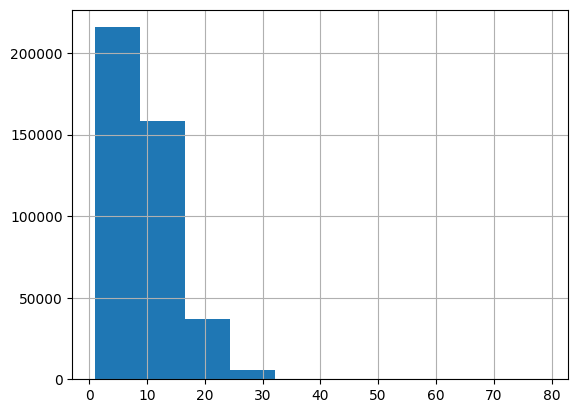

In [25]:
df_emotions['number_words'].hist()

<AxesSubplot: >

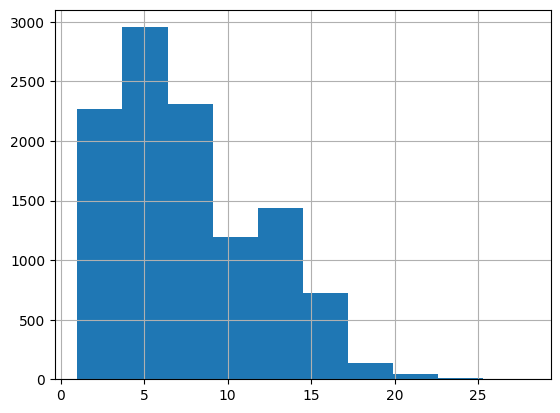

In [26]:
df_neutral['number_words'].hist()

In [27]:
#Check the distribution of number of words 
text_3std_emotions = df_emotions['number_words'][~((df_emotions['number_words'] - df_emotions['number_words'].mean()).abs() > 3*df_emotions['number_words'].std())]

In [28]:
print(text_3std_emotions.skew()) 
print(text_3std_emotions.mean()) 

0.8684459268626293
9.174456972028548


<AxesSubplot: >

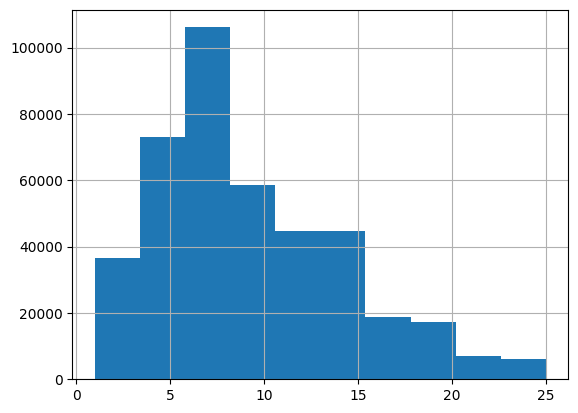

In [29]:
text_3std_emotions.hist()

In [30]:
text_3std_neutral = df_neutral['number_words'][~((df_neutral['number_words'] - df_neutral['number_words'].mean()).abs() > 3*df_neutral['number_words'].std())]

In [31]:
print(text_3std_neutral.skew()) 
print(text_3std_neutral.mean()) 

0.5137299700980401
7.582186821144099


<AxesSubplot: >

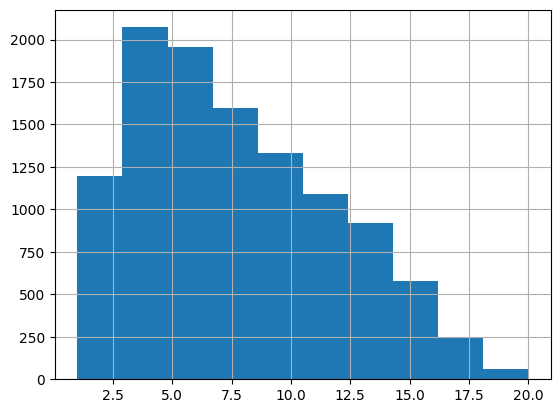

In [32]:
text_3std_neutral.hist()